<a href="https://colab.research.google.com/github/ehdwls314/prac_class/blob/main/20184617_%EC%9D%B4%EB%8F%99%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#코로나로 인한 소비 변화



In [8]:
# 데이터 로딩
install.packages("dplyr")

install.packages("lubridate")
install.packages("plotly")
library(dplyr)

library(lubridate)
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




##1) index.csv 파일의 cgi(2018년 대비 성장지수) 를 통해 코로나 이전인 2018년과 비교하여 매출이 성장한 산업의 비율을 계산해 보았다.

index.csv 파일을 index로 불러온다 

In [9]:
system("gdown --id 1sSwgqNFNVxc8jaV0WBJJYPEBOW9AAvKb")
index = read.csv("index.csv", encoding="UTF-8") 

In [10]:
head(index)

,period,catl,catm,age,gender,sido,sigungu,cgi
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.37464
2,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.59645
3,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.99285
4,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.34273
5,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.14760
6,201901,건강/의료용품,건강관리용품,20,F,서울,성북구,78.89383


cgi는 2018년 대비 산업의 성장 수치이므로, 코로나 이후인 2020년 01월부터 05월까지 추출하여 index_covid 로 저장

In [11]:
index_covid <- subset(index, period>='202001' & period<='202005')

In [13]:
head(index_covid)  #202001 부터 202005까지 잘 추출 됐는지 확인

,period,catl,catm,age,gender,sido,sigungu,cgi
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
90129,202001,건강/의료용품,건강관리용품,20,F,서울,all,101.08046
90130,202001,건강/의료용품,건강관리용품,20,F,서울,강동구,142.59827
90131,202001,건강/의료용품,건강관리용품,20,F,서울,광진구,92.48459
90132,202001,건강/의료용품,건강관리용품,20,F,서울,구로구,162.75640
90133,202001,건강/의료용품,건강관리용품,20,F,서울,양천구,77.56879
90134,202001,건강/의료용품,건강관리용품,20,M,서울,강남구,163.17791


In [14]:
tail(index_covid)  #202001 부터 202005까지 잘 추출 됐는지 확인

,period,catl,catm,age,gender,sido,sigungu,cgi
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
127520,202005,화장품,화장품,all,M,서울,종로구,38.73973
127521,202005,화장품,화장품,all,all,서울,강서구,51.36566
127522,202005,화장품,화장품,all,all,서울,관악구,61.99787
127523,202005,화장품,화장품,all,all,서울,금천구,82.19840
127524,202005,화장품,화장품,all,all,서울,도봉구,35.87560
127525,202005,화장품,화장품,all,all,서울,용산구,45.56938


대분류 4개 품목에 대한 CGI가 100이상인, 즉 2018년에 비해 성장한 산업의 개수의 비율을 계산

In [15]:
index_covid$cgii = as.numeric(index_covid$cgi>100) #100이상인 cgi 에 대하여 새로운 변수 cgii에 저장

In [16]:

length(which((index_covid$catl=='건강/의료용품')&(index_covid$cgii==1)))/length(which(index_covid$catl=='건강/의료용품'))
length(which((index_covid$catl=='식품')&(index_covid$cgii==1)))/length(which(index_covid$catl=='식품'))
length(which((index_covid$catl=='일용품')&(index_covid$cgii==1)))/length(which(index_covid$catl=='일용품'))
length(which((index_covid$catl=='화장품')&(index_covid$cgii==1)))/length(which(index_covid$catl=='화장품'))
#각 4개의 대분류에 대하여 비율 계산

[1] 0.3682853

[1] 0.3139962

[1] 0.171658

[1] 0.1598303

In [17]:
df =  data.frame(catl=c('건강/의료용품',"식품","일용품","화장품"), 
                 per=c(0.368285,0.313996,0.171658,0.159830))
df 

catl,per
<chr>,<dbl>
건강/의료용품,0.368285
식품,0.313996
일용품,0.171658
화장품,0.159830


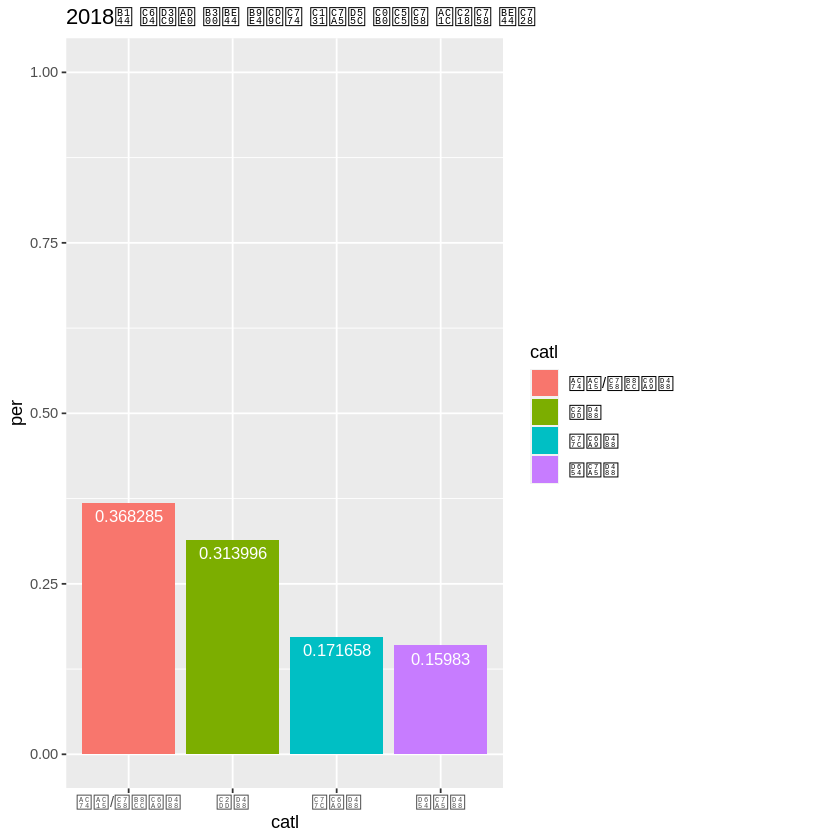

In [30]:

ggplot(data=df, aes(x=catl, y=per,fill=catl)) +
  ylim(0,1) +
  ggtitle("2018년 월평균 대비 매출이 성장한 산업의 개수의 비율")+
  geom_bar(stat="identity")  +
  geom_text(aes(label=per), color = "white", vjust=1.6, size=3.5)

그래프를 보면 2018년 대비 매출이 성장한 산업의 개수가 굉장히 적다는 것을 알 수 있다. 

##2) 날짜별 매출건수, 매출액 변화

코로나 발생 이후 날짜별 매출 건수와 매출액의 변화가 어떻게 나타나는지 살펴보고자 함

card_20200717.csv 데이터를 card에 저장

In [25]:
system("gdown --id 1sSwgqNFNVxc8jaV0WBJJYPEBOW9AAvKb")
card = read.csv("card_20200717.csv", encoding="UTF-8") 

매출에 미치는 코로나의 영향을 알아보기 위해 날짜별 평균 매출 건수와 매출액을 구하여 이를 그래프로 시각화.

In [26]:
card$receipt_dttm <- ymd(card$receipt_dttm)
card <- card%>% mutate(month = month(receipt_dttm)) %>% filter(month != 6)
tail(card)

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,month
,<date>,<int>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>
3333533,2020-05-31,1130562500,수유2동,6140,주 차 장,1,900,5
3333534,2020-05-31,1165065200,양재2동,8310,농축수산품,3,48300,5
3333535,2020-05-31,1120052000,왕십리2동,8499,기타건강식,1,100000,5
3333536,2020-05-31,1171056100,방이1동,2104,스크린골프,3,105000,5
3333537,2020-05-31,1126057500,면목3.8동,2104,스크린골프,9,273000,5
3333538,2020-05-31,1129060000,안암동,8031,위탁급식업,6,27500,5


In [28]:
# 날짜별 매출건수, 매출액 평균
card.date <- group_by(card, receipt_dttm) %>% summarize(day_selng_cascnt = mean(selng_cascnt), day_salamt = mean(salamt/10000))
head(card.date)

receipt_dttm,day_selng_cascnt,day_salamt
<date>,<dbl>,<dbl>
2020-01-04,393.9144,1421.1180
2020-01-05,339.0857,963.1334
2020-01-06,726.1665,1829.2555
2020-01-07,485.9142,1768.5752
2020-01-08,476.2511,2199.8506
2020-01-09,537.2911,1891.7808


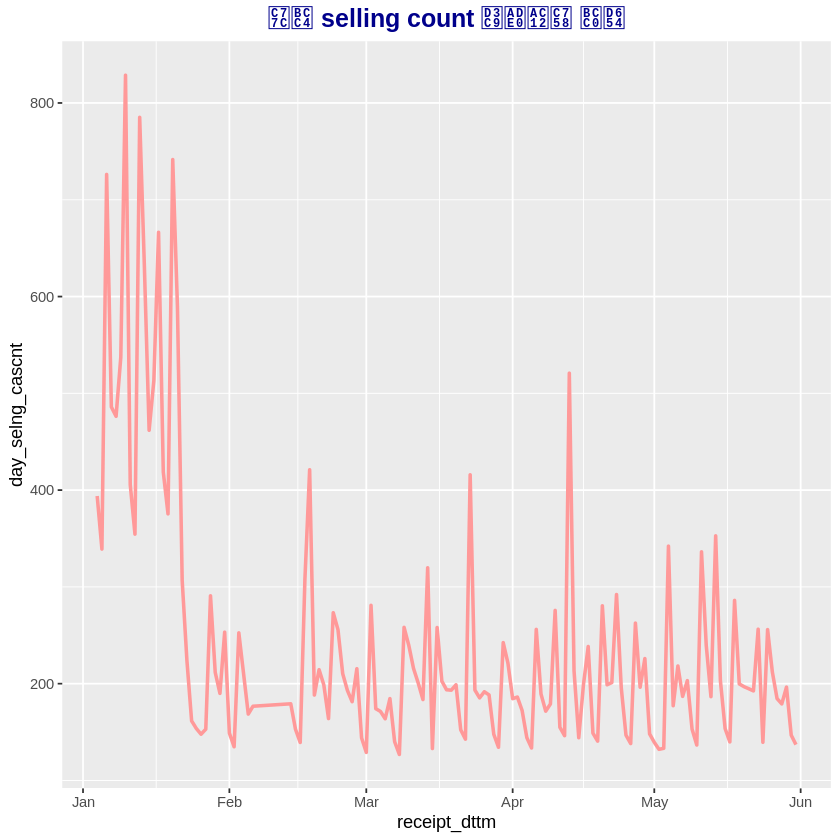

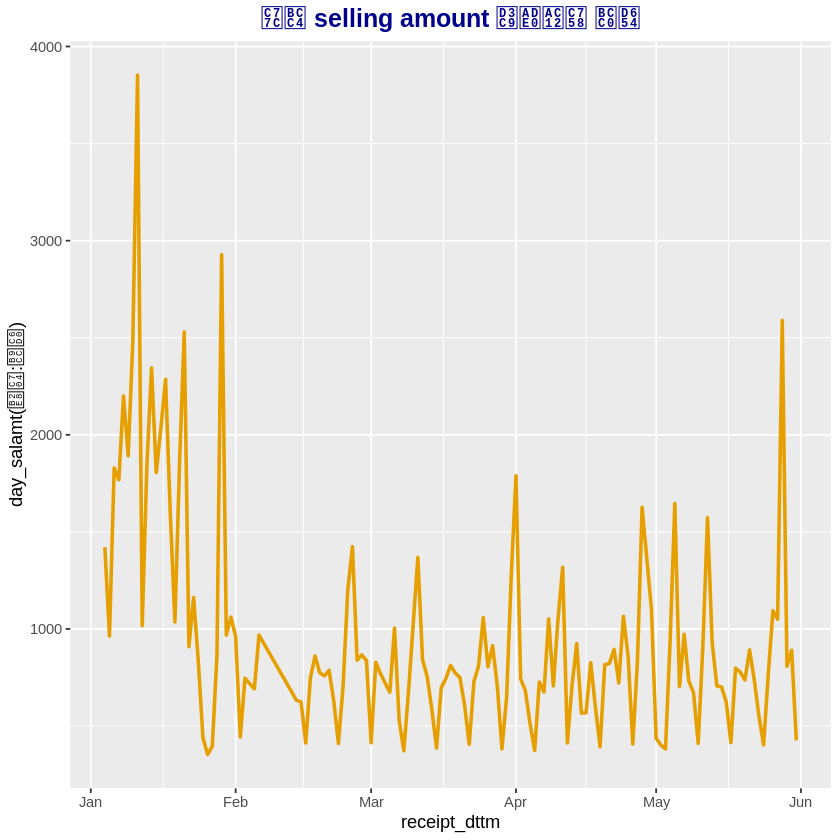

In [31]:
# 날짜별 평균 매출 건수와 매출액 변화 

 day_selng_cascnt_change<- ggplot(card.date) +
  geom_line(mapping = aes(x = receipt_dttm, y = day_selng_cascnt), color = '#FF9999', lwd = 1) +
  ggtitle("일별 selling count 평균값의 변화") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))

day_salamt_change <- ggplot(card.date,aes(x = receipt_dttm, y= day_salamt(단위:만원))) +
  geom_line(mapping = aes(x = receipt_dttm, y = day_salamt), color = '#E69F00', lwd = 1) +
  ggtitle("일별 selling amount 평균값의 변화") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15, color = "darkblue"))

day_selng_cascnt_change
day_salamt_change

매출건수와 매출액이 전반적으로 1월 말 ~ 2월 초를 기준으로 감소한 것을 알 수 있음